<a href="https://colab.research.google.com/github/sumedhasjs/Machine-Learning-Laboratory/blob/main/ANN_BT19ECE107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd 'gdrive/MyDrive/ML Lab Datasets'

/content/gdrive/MyDrive/ML Lab Datasets


# **Importing Libraries**

In [37]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch import optim
from tqdm import tqdm
import random
import math
from sklearn.metrics import roc_curve, roc_auc_score 
import scikitplot as skplt

# Loading Data and Preprocessing

In [5]:
data=loadmat('Matlab_cancer.mat')

In [6]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

Using cpu device


In [7]:
data_x=data['x']
data_y=data['t']

In [8]:
data_x

array([[0.46290091, 0.37056537, 0.46155037, ..., 0.58252595, 0.63768441,
        0.52859127],
       [0.40673611, 0.30643103, 0.27898015, ..., 0.4498    , 0.49972172,
        0.45315089],
       [0.30621525, 0.23971475, 0.20660846, ..., 0.34488742, 0.33761557,
        0.41943002],
       ...,
       [0.08009822, 0.23816822, 0.23361855, ..., 0.15979104, 0.13400809,
        0.1597645 ],
       [0.14462108, 0.18637254, 0.17546801, ..., 0.10701832, 0.1389127 ,
        0.29903768],
       [0.10640488, 0.12637318, 0.0999025 , ..., 0.17790702, 0.177601  ,
        0.17012326]])

In [9]:
data_x=np.transpose(data_x)

In [10]:
np.transpose(data_y)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [11]:
data_y=data_y[0]

In [12]:
data_x.shape

(216, 100)

In [16]:
data_y.shape

(216,)

# **Splitting Data into Testing, training and Validation sets**

In [18]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,train_size=0.8,shuffle=True,random_state=0)
train_x,validation_x,train_y,validation_y=train_test_split(data_x,data_y,train_size=0.8,shuffle=True,random_state=0)

In [19]:
train_x.shape,test_x.shape, validation_x.shape

((172, 100), (44, 100), (44, 100))

In [20]:
train_y.shape,test_y.shape, validation_y.shape

((172,), (44,), (44,))

In [21]:
class ArtificialNeuralNetwork1(nn.Module):
  def __init__(self):
    super(ArtificialNeuralNetwork1,self).__init__()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(100,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,1)
    )

  def forward(self,x):
    logits=self.linear_relu_stack(x)
    logits=torch.sigmoid(logits)
    return logits

In [22]:
class ArtificialNeuralNetwork2(nn.Module):
  def __init__(self):
    super(ArtificialNeuralNetwork2,self).__init__()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(100,256),
        nn.ReLU(),
        nn.Linear(256,256),
        nn.ReLU(),
        nn.Linear(256,1)
    )

  def forward(self,x):
    logits=self.linear_relu_stack(x)
    logits=torch.sigmoid(logits)
    return logits

In [23]:
train_x=torch.from_numpy(train_x.astype(np.float32))
test_x=torch.from_numpy(test_x.astype(np.float32))
train_y=torch.from_numpy(train_y.astype(np.float32))
test_y=torch.from_numpy(test_y.astype(np.float32))

In [24]:
train_y=train_y.view(train_y.shape[0],1)
test_y=test_y.view(test_y.shape[0],1)

In [25]:
train_x.shape,test_x.shape, validation_x.shape

(torch.Size([172, 100]), torch.Size([44, 100]), (44, 100))

In [26]:
train_y.shape,test_y.shape, validation_y.shape

(torch.Size([172, 1]), torch.Size([44, 1]), (44,))

In [27]:
train_dataloader=DataLoader(train_x,batch_size=4,shuffle=True)
test_dataloader=DataLoader(test_x,batch_size=4,shuffle=True)

## **Model 1**

In [28]:
model=ArtificialNeuralNetwork1()
epochs_num=20
criterion = nn.BCELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
train_accuracy= []
for epoch in range(epochs_num):
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    y_predicted_cls = y_pred.round()
    acc = y_predicted_cls.eq(train_y).sum() / float(train_y.shape[0])
    
    train_accuracy.append(acc)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy = {acc}')

epoch: 1, loss = 0.6889, accuracy = 0.7209302186965942
epoch: 2, loss = 0.5764, accuracy = 0.8604651093482971
epoch: 3, loss = 0.4948, accuracy = 0.8720930218696594
epoch: 4, loss = 0.4280, accuracy = 0.8720930218696594
epoch: 5, loss = 0.3751, accuracy = 0.8837209343910217
epoch: 6, loss = 0.3351, accuracy = 0.8720930218696594
epoch: 7, loss = 0.3074, accuracy = 0.854651153087616
epoch: 8, loss = 0.2898, accuracy = 0.8604651093482971
epoch: 9, loss = 0.2795, accuracy = 0.8662790656089783
epoch: 10, loss = 0.2732, accuracy = 0.8720930218696594
epoch: 11, loss = 0.2688, accuracy = 0.8662790656089783
epoch: 12, loss = 0.2650, accuracy = 0.8720930218696594
epoch: 13, loss = 0.2606, accuracy = 0.8779069781303406
epoch: 14, loss = 0.2550, accuracy = 0.8837209343910217
epoch: 15, loss = 0.2484, accuracy = 0.8895348906517029
epoch: 16, loss = 0.2406, accuracy = 0.8895348906517029
epoch: 17, loss = 0.2321, accuracy = 0.895348846912384
epoch: 18, loss = 0.2230, accuracy = 0.895348846912384
epoc

Accuracy of Model-1

In [30]:
with torch.no_grad():
    y_predicted = model(test_x)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(test_y).sum() / float(test_y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9318


**Confusion Matrix, Specificity and Sensitivity of Model-1**

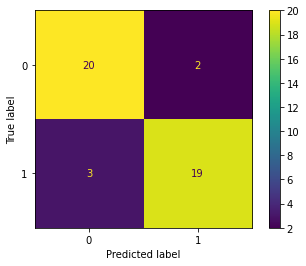

Sensitivity :  0.9090909090909091
Specificity :  0.8636363636363636


In [47]:
cm = confusion_matrix(test_y, y_predicted.round())
disp_rbf = ConfusionMatrixDisplay(cm)
disp_rbf.plot()
plt.show()

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

**Accuracy-Model1**

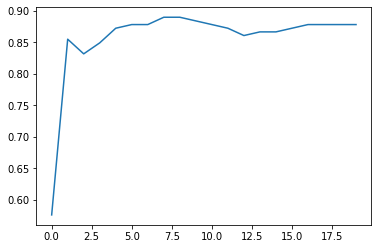

In [48]:
plt.plot(train_accuracy)

**AUROC Score-Model1**

In [40]:
print('AUROC Score: ',roc_auc_score(test_y, y_predicted.round()))

AUROC Score:  0.9318181818181819


# Model-2

In [41]:
model=ArtificialNeuralNetwork2()
epochs_num=20
criterion = nn.BCELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
train_accuracy= []
for epoch in range(epochs_num):
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    y_predicted_cls = y_pred.round()
    acc = y_predicted_cls.eq(train_y).sum() / float(train_y.shape[0])
    
    train_accuracy.append(acc)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy = {acc}')

epoch: 1, loss = 0.6966, accuracy = 0.5755813717842102
epoch: 2, loss = 0.6408, accuracy = 0.854651153087616
epoch: 3, loss = 0.5950, accuracy = 0.8313953280448914
epoch: 4, loss = 0.5546, accuracy = 0.8488371968269348
epoch: 5, loss = 0.5161, accuracy = 0.8720930218696594
epoch: 6, loss = 0.4787, accuracy = 0.8779069781303406
epoch: 7, loss = 0.4423, accuracy = 0.8779069781303406
epoch: 8, loss = 0.4087, accuracy = 0.8895348906517029
epoch: 9, loss = 0.3783, accuracy = 0.8895348906517029
epoch: 10, loss = 0.3517, accuracy = 0.8837209343910217
epoch: 11, loss = 0.3288, accuracy = 0.8779069781303406
epoch: 12, loss = 0.3100, accuracy = 0.8720930218696594
epoch: 13, loss = 0.2951, accuracy = 0.8604651093482971
epoch: 14, loss = 0.2836, accuracy = 0.8662790656089783
epoch: 15, loss = 0.2749, accuracy = 0.8662790656089783
epoch: 16, loss = 0.2685, accuracy = 0.8720930218696594
epoch: 17, loss = 0.2637, accuracy = 0.8779069781303406
epoch: 18, loss = 0.2600, accuracy = 0.8779069781303406
ep

Accuracy-Model 2

In [43]:
with torch.no_grad():
    y_predicted = model(test_x)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(test_y).sum() / float(test_y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.8864


Confusion Matrix, Specificity and Sensitivity- Model 2

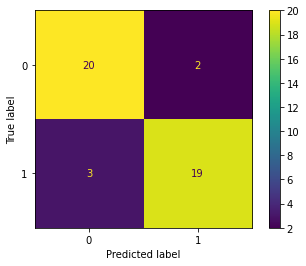

In [44]:
cm = confusion_matrix(test_y, y_predicted.round())
disp_rbf = ConfusionMatrixDisplay(cm)
disp_rbf.plot()
plt.show()

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy-Model 2

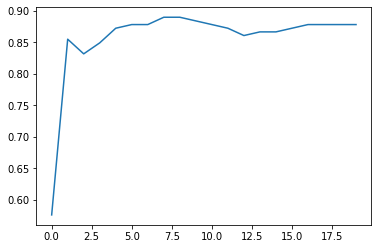

In [45]:
plt.plot(train_accuracy)

AUROC Score-Model 2

In [46]:
print('AUROC Score: ',roc_auc_score(test_y, y_predicted.round()))

AUROC Score:  0.8863636363636365
